**<h1> Tesla Stock Price Prediction using Machine Learning in Python</h1>**


### Presented By :
1. Aditya Kumar Thakur **(21052556)**
2. Amol Kshitij **(21052137)**

Machine learning proves immensely helpful in many industries in automating tasks that earlier required human labor one such application of ML is predicting whether a particular trade will be profitable or not.

In thiprojectle, we will learn how to predict a signal that indicates whether buying a particular stock will be helpful or not by using ML.

### Importing Libraries :
Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.

1.**Pandas** – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

2.**Numpy** – Numpy arrays are very fast and can perform large computations in a very short time.

3.**Matplotlib/Seaborn** – This library is used to draw visualizations.

4.**Sklearn** – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.

5.**XGBoost** – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.ctions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

**<h3>Importing Dataset</h3>**


The dataset we will use here to perform the analysis and build a predictive model is Tesla Stock Price data. We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 1st January 2010 to 31st December 2017 which is for 8 years for the Tesla stocks.

In [2]:
df = pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


**From the first five rows, we can see that data for some of the dates is missing the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days.**

In [3]:
df.shape

(1692, 7)

From this, we got to know that there are 1692 rows of data available and for each row, we have 7 different features or columns.

In [4]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


**<h3>Exploratory Data Analysis</h3>**


EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

While performing the EDA of the Tesla Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

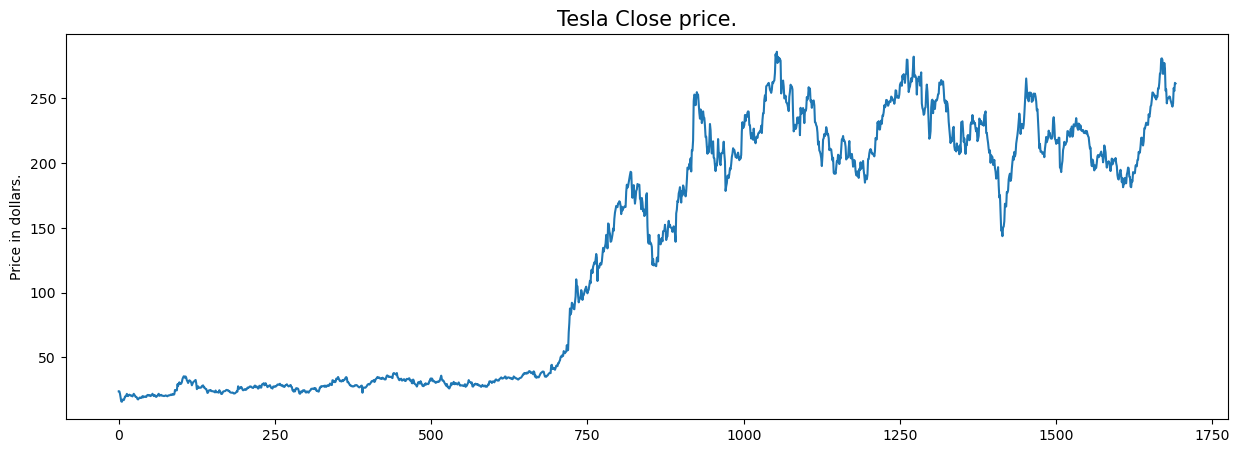

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.




In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.




In [8]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [9]:
df = df.drop(['Adj Close'], axis=1)

Now let’s draw the distribution plot for the continuous features given in the dataset.

Before moving further let’s check for the null values if any are present in the data frame.




In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

This implies that there are no null values in the data set provided.

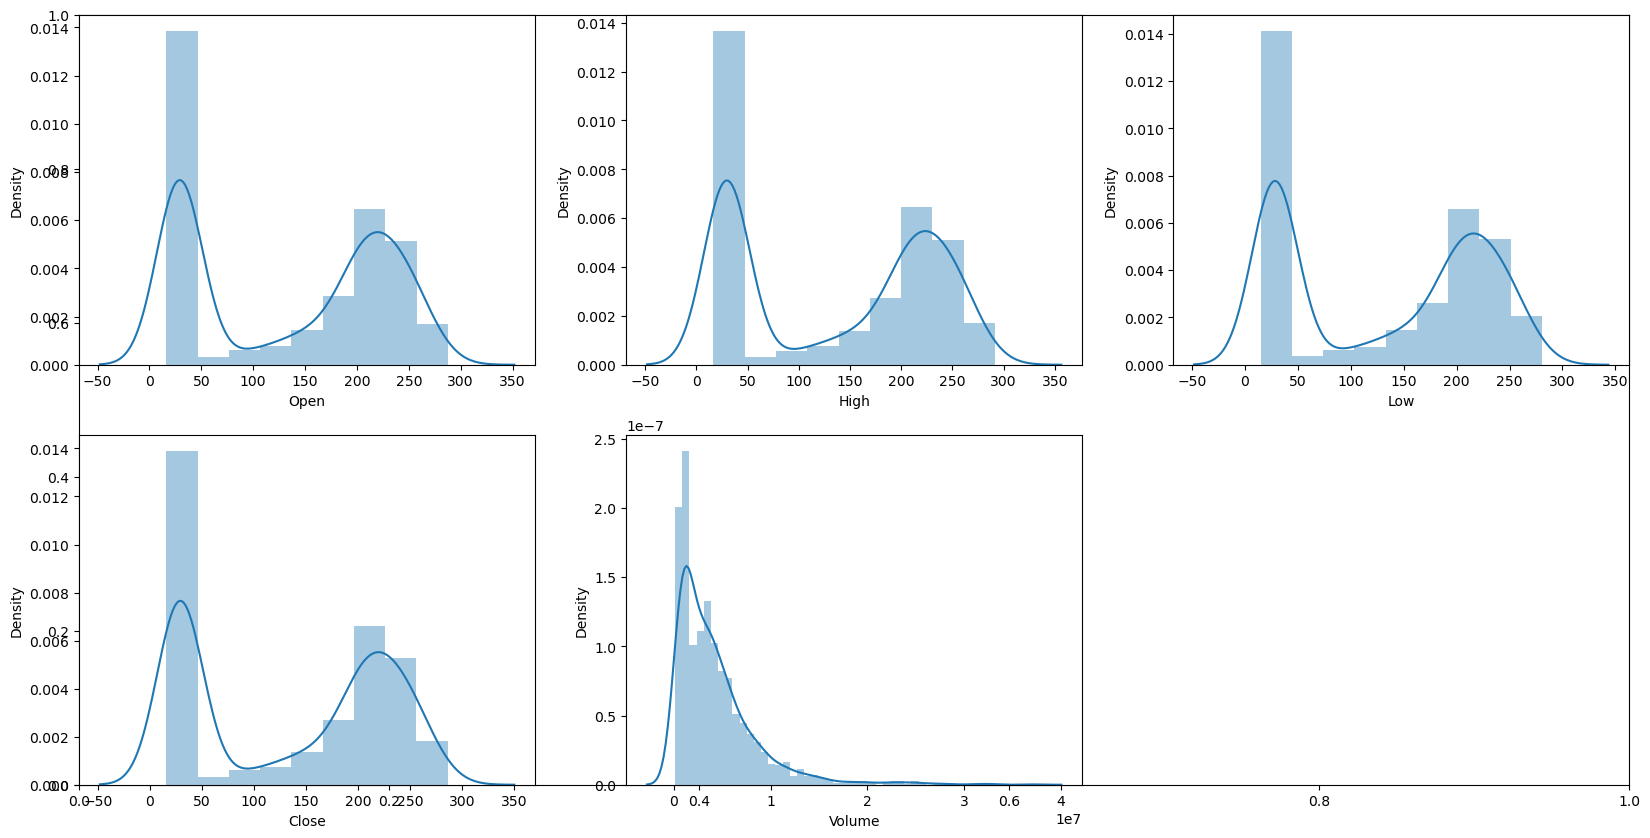

In [11]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. **And the Volume data is left-skewed.**

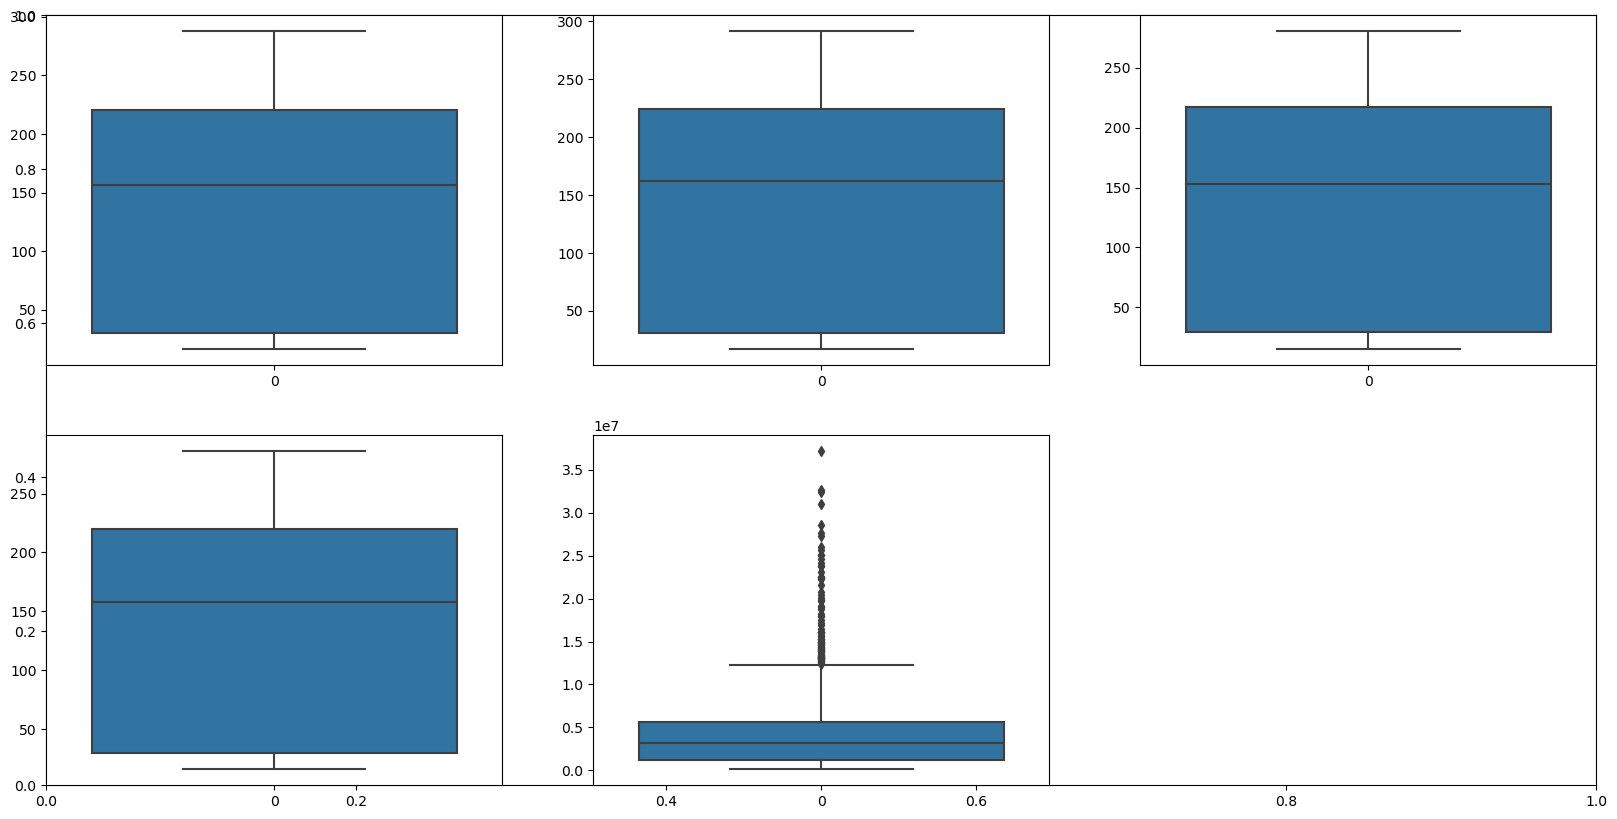

In [12]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

**<h3>Feature Engineering</h3>**

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.




In [13]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.




In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

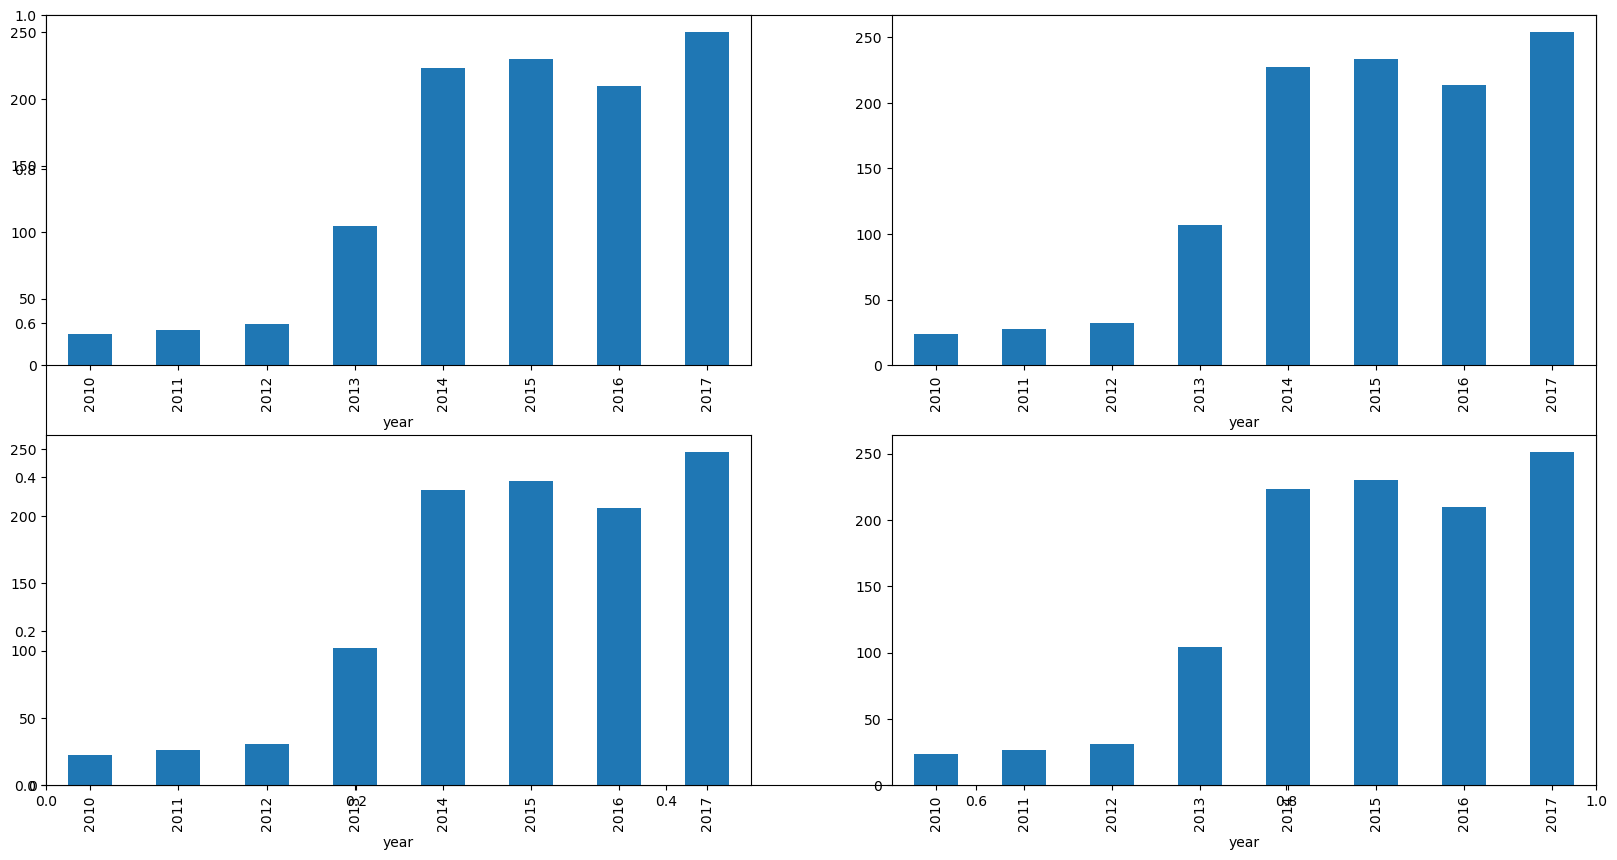

In [15]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled from the year 2013 to that in 2014.




In [16]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [17]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.




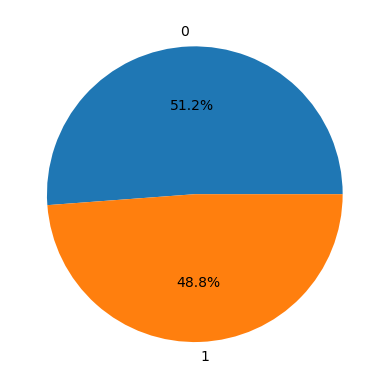

In [18]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.



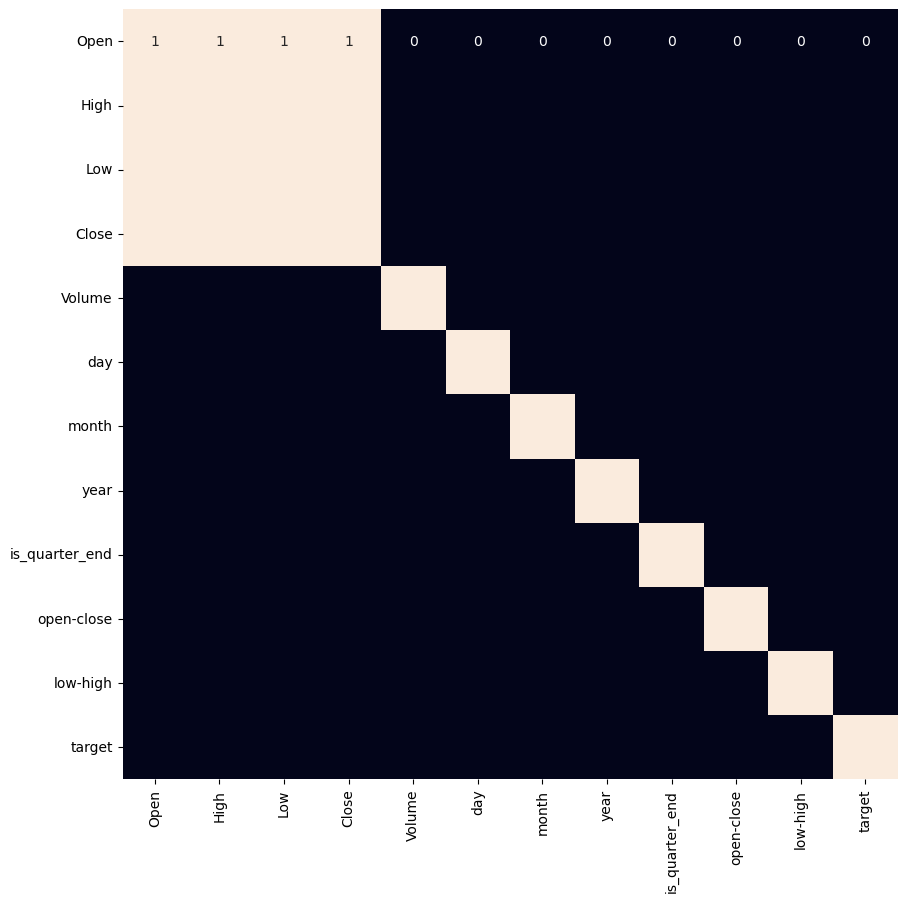

In [19]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [20]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1522, 3) (170, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.



### Model Evaluation and Comparison

In this section of the code, we evaluate multiple machine learning models to compare their performance on a classification task. The models included are **Logistic Regression**, **Support Vector Machine (SVC)**, and **XGBoost Classifier**. We use various evaluation metrics to assess how well each model predicts the target variable on a test dataset.

#### Models Used:
1. **Logistic Regression**:
   - A simple linear model that is widely used for binary classification tasks. It estimates probabilities using a logistic function, making it efficient for tasks where the relationship between the features and the target is linear.
   
2. **Support Vector Classifier (SVC)**:
   - A powerful algorithm that finds the optimal hyperplane to separate classes in high-dimensional space. By setting `probability=True`, it allows us to predict probabilities needed for the ROC AUC evaluation.

3. **XGBoost Classifier**:
   - An efficient and scalable implementation of gradient boosting, which builds an ensemble of decision trees in a sequential manner to minimize prediction error. It is widely used for structured/tabular data and provides high accuracy in many scenarios.

#### Evaluation Metrics:
We compute the following classification metrics to evaluate the models:
- **Accuracy**: The fraction of correctly classified samples.
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to the total actual positives.
- **F1 Score**: The harmonic mean of Precision and Recall, providing a balance between the two.
- **ROC AUC**: The area under the Receiver Operating Characteristic curve, which evaluates how well the model distinguishes between positive and negative classes.

#### Purpose of Code:
This code is added to the project to:
- Train and evaluate different classification models on the dataset.
- Compare the models based on key performance metrics.
- Choose the best model that provides the highest accuracy and generalization capability for the given task. 

By doing this, we can ensure that the selected model is robust and performs well on unseen data.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Ensure the features and target are defined correctly
features = df[['open-close', 'low-high', 'is_quarter_end']]  # Features should be updated based on your dataset
target = df['target']  # Ensure the target is correctly specified

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the models to evaluate
models = [
    LogisticRegression(),
    SVC(probability=True),  # SVC requires probability=True to compute ROC AUC
    XGBClassifier(eval_metric='logloss')  # Ensure XGBoost has an evaluation metric
]

# Train the models and evaluate them
evaluation_results = {}
for model in models:
    model_name = model.__class__.__name__
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Collect evaluation metrics
    evaluation_results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_probs) if y_probs is not None else "N/A"
    }

# Display results
for model_name, metrics in evaluation_results.items():
    print(f"Evaluation for {model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


Evaluation for LogisticRegression:
  Accuracy: 0.5133
  Precision: 0.5034
  Recall: 0.8922
  F1 Score: 0.6436
  ROC AUC: 0.5022

Evaluation for SVC:
  Accuracy: 0.5074
  Precision: 0.5000
  Recall: 0.9162
  F1 Score: 0.6469
  ROC AUC: 0.5176

Evaluation for XGBClassifier:
  Accuracy: 0.4867
  Precision: 0.4813
  Recall: 0.5389
  F1 Score: 0.5085
  ROC AUC: 0.5050



### Model Evaluation Summary

The evaluation metrics for three models—**Logistic Regression**, **Support Vector Classifier (SVC)**, and **XGBoost (XGBClassifier)**—are as follows:

1. **Accuracy**: Measures the percentage of correct predictions.
2. **Precision**: Proportion of positive predictions that were actually correct.
3. **Recall**: Proportion of actual positive cases correctly predicted by the model.
4. **F1 Score**: Harmonic mean of Precision and Recall, offering a balance between the two.
5. **ROC AUC**: Measures the model's ability to distinguish between classes, with higher values indicating better performance.

### Interpretation of Results:

- **Logistic Regression** has a moderate recall of 89.22%, meaning it correctly identifies most of the positive cases. However, its low accuracy (51.33%) and ROC AUC (0.5022) indicate poor general performance.
  
- **SVC** shows a similar trend with a slightly higher ROC AUC (0.5176), but its accuracy is also around 50%. Its higher recall (91.62%) suggests it does well in identifying positive cases but may struggle with overall performance.

- **XGBClassifier** has the lowest accuracy (48.67%) and precision (48.13%), showing it is less reliable in making positive predictions, but its recall is lower compared to Logistic Regression and SVC (53.89%).

### Key Takeaways:
- **Recall** is high for both Logistic Regression and SVC, meaning these models are better at catching positive cases, but they still have poor overall performance with lower accuracy and ROC AUC scores.
- **XGBoost** has the least favorable performance in most metrics, particularly with lower accuracmbalanced predictions.

### Visualization of Model Evaluation Metrics

This section of the code generates a bar plot to visually compare the evaluation metrics (Accuracy, Precision, Recall, F1 Score, and ROC AUC) for the different models: **Logistic Regression**, **Support Vector Machine (SVC)**, and **XGBoost**. The metrics for each model are displayed on the y-axis, with each model represented on the x-axis.

#### Key Features:
- **Data Conversion**: The evaluation results are converted into a DataFrame format to facilitate easier manipulation and visualization.
- **Handling Missing Values**: The value "N/A" (used for models that don't support certain metrics) is replaced with `None` for compatibility with plotting functions.
- **Bar Plot**: The `plot(kind='bar')` function is used to create a bar chart, where each model’s performance on different metrics is visually represented.
- **Styling**: The plot is customized with labels, a title, grid lines for better readability, and proper spacing to make the chart visually appealing.

#### Purpose:
The goal of this visualization is to provide a quick and easy way to compare how different models perform across various evaluation metrics. It allows us to visually identify which model performs best in terms of accuracy, precision, recall, F1 score, and ROC AUC, helping inform the decision on which model to use for further analysis or deployment.

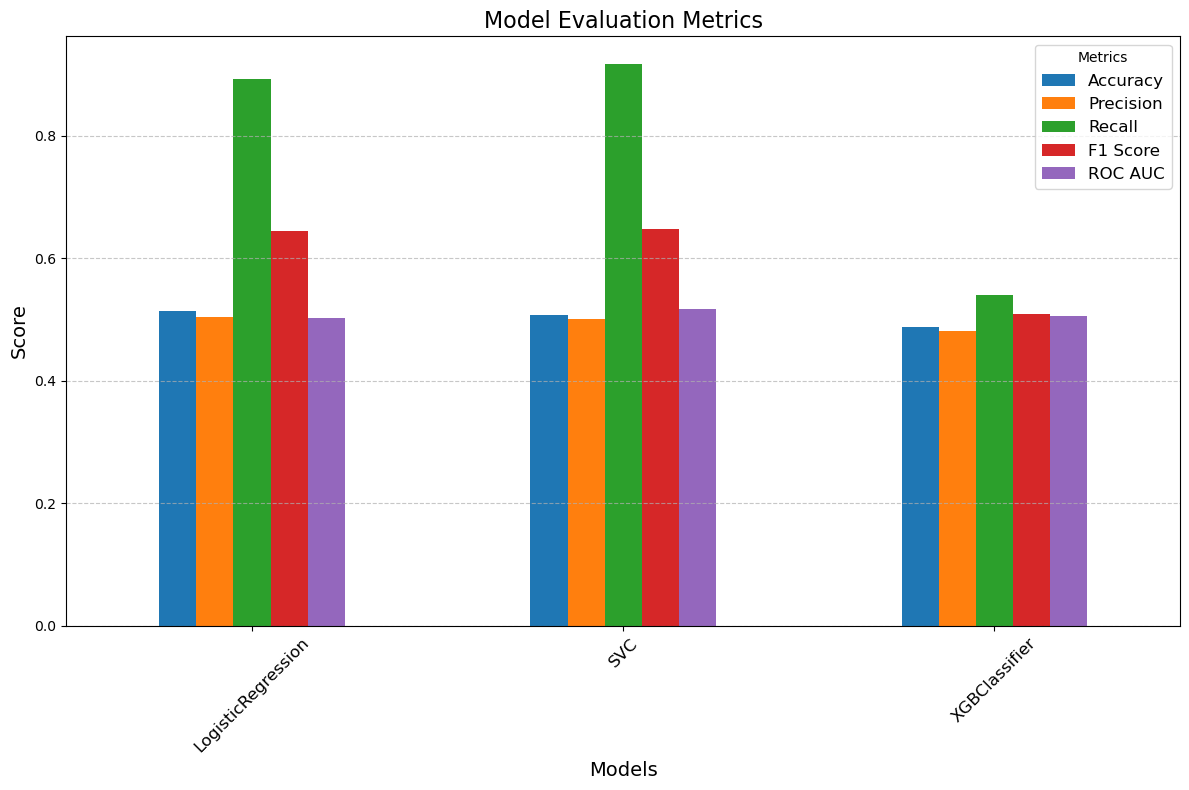

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the evaluation results to a DataFrame for easier plotting
evaluation_df = pd.DataFrame(evaluation_results).T  # Transpose for better format

# Replace "N/A" with NaN for plotting
evaluation_df.replace("N/A", None, inplace=True)

# Plot each metric as a bar plot
evaluation_df.plot(kind='bar', figsize=(12, 8))
plt.title("Model Evaluation Metrics", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Metrics", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### ROC AUC Curves for Model Comparison

This section of the code plots the **ROC (Receiver Operating Characteristic)** curves for all evaluated models, allowing for a visual comparison of their classification performance.

#### Key Features:
- **ROC Curve**: The ROC curve is plotted by calculating the **False Positive Rate (FPR)** and **True Positive Rate (TPR)** for each model. The curve helps assess the trade-off between sensitivity (True Positives) and specificity (False Positives) at different thresholds.
- **AUC (Area Under the Curve)**: The AUC value quantifies the overall ability of the model to discriminate between classes, with a higher AUC indicating better performance.
- **Model Comparison**: Each model's ROC curve is plotted with its corresponding AUC, allowing us to compare the performance of the models.
- **Random Guess Line**: A diagonal line (AUC = 0.5) represents the performance of a model that makes random predictions, serving as a baseline for comparison.

#### Purpose:
This visualization aids in comparing the models' classification abilities. By examining the ROC curves and AUC values, we can easily determine which model is most effective in distinguishing between the positive and negative classes. A model with a higher AUC is preferred, as it indicates better predictive performance.

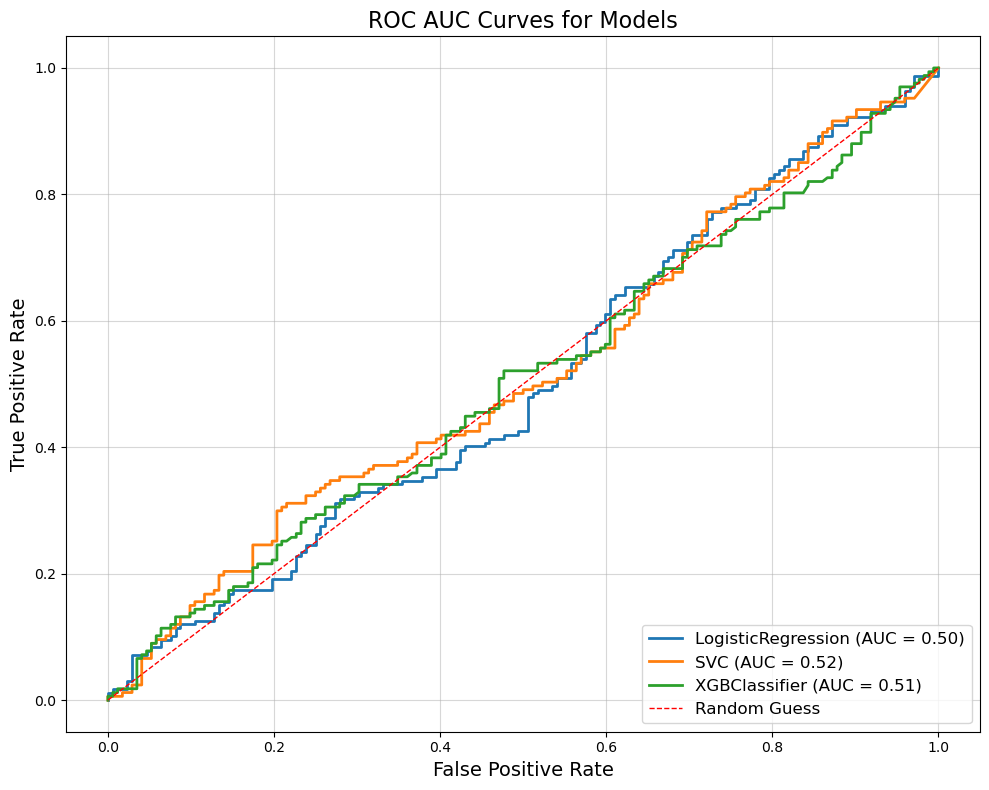

In [23]:
from sklearn.metrics import roc_curve, auc

# Plot ROC AUC curves for all models
plt.figure(figsize=(10, 8))

for model in models:
    model_name = model.__class__.__name__
    
    # Ensure the model can provide probabilities
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        
        # Plot each ROC curve
        plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.2f})")
    else:
        print(f"{model_name} does not support probability prediction and is skipped.")

# Plot a diagonal line for random guessing
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1, label="Random Guess")

# Add labels, title, and legend
plt.title("ROC AUC Curves for Models", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


### Plotting Stock Prices with Moving Averages (5-day & 20-day)

In this analysis, we calculate and plot the **5-day** and **20-day** moving averages (MA) of a stock's **closing price**. Moving averages are commonly used in stock analysis to smooth price data and identify trends.

- **5-day MA**: This moving average is calculated by averaging the closing prices of the last 5 days, providing a short-term trend.
- **20-day MA**: Similarly, this moving average considers the closing prices over the last 20 days, showing a medium-term trend.

The plot will display the stock's **closing price** alongside the **5-day** and **20-day** moving averages, which helps identify short-term and long-term td on market trends.

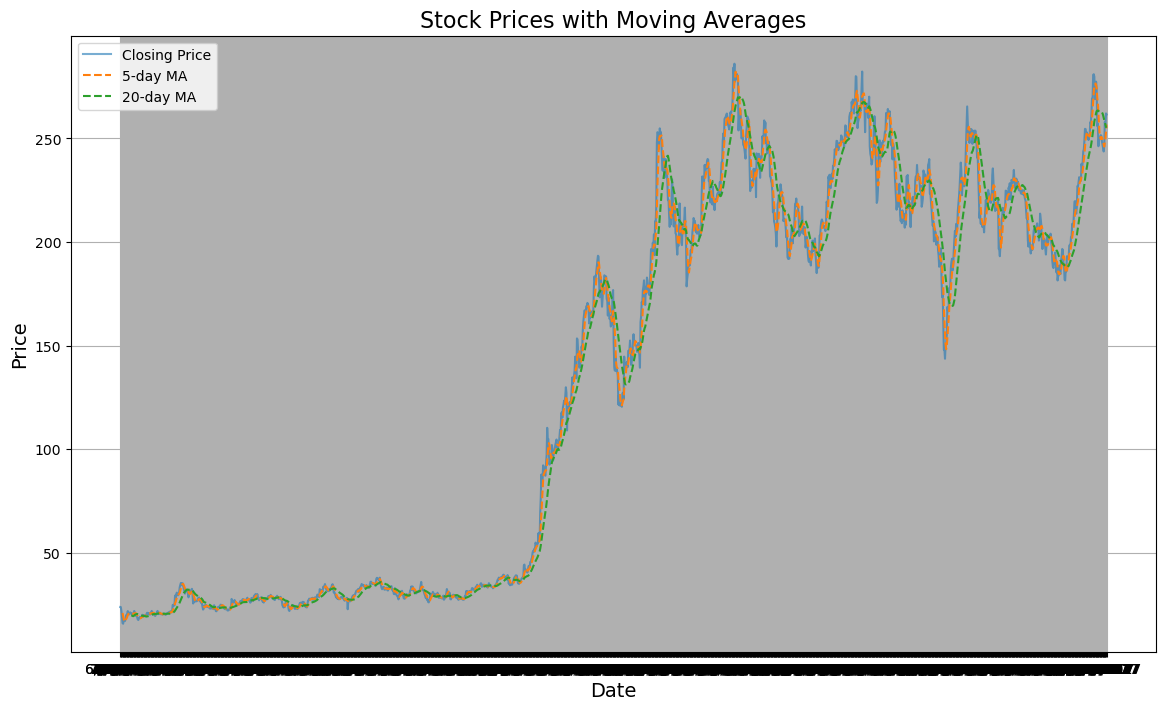

In [24]:
# Calculate moving averages
df['5-day MA'] = df['Close'].rolling(window=5).mean()
df['20-day MA'] = df['Close'].rolling(window=20).mean()

# Plot Moving Averages
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.6)
plt.plot(df['Date'], df['5-day MA'], label='5-day MA', linestyle='--')
plt.plot(df['Date'], df['20-day MA'], label='20-day MA', linestyle='--')
plt.title('Stock Prices with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid()
plt.show()


### Explanation of the Output:

- **Closing Price (Blue Line)**: The stock's actual closing price fluctuates daily, showing the market's movements.
- **5-day MA (Dashed Line)**: This line tracks the short-term trend by smoothing out daily fluctuations. It responds quickly to price changes.
- **20-day MA (Dashed Line)**: The 20-day moving average provides a broader view of the stock's price movement over a longer period, offering insights into the medium-term trend.

By comparing the **5-day** and **20-day** MAs, one can observe potential trends:
- **Bullish Signal**: When the 5-day MA crosses above the 20-day MA, it could signal a potential upward price movement (a "golden cross").
- **Bearish Signal**: When the 5-day MA crosses below the 20-day MA, it might indicate a downward price trend (a "death cross").

This analysis helps traders and investors make informed decisions based on market trends

### Actual vs Predicted Stock Prices

In this visualization, we compare the **actual stock prices** and the **predicted stock prices** from a machine learning model, providing insights into the model's performance.

- **Actual Prices (Blue Line)**: The true stock prices over time, as observed in the dataset. These values represent the real market data for the stock's closing price.
- **Predicted Prices (Red Dashed Line)**: These are the predicted stock prices generated by the model, displayed using a dashed red line. The model's predictions are compared to the actual stock prices to evaluate its accuraodel accuracy.

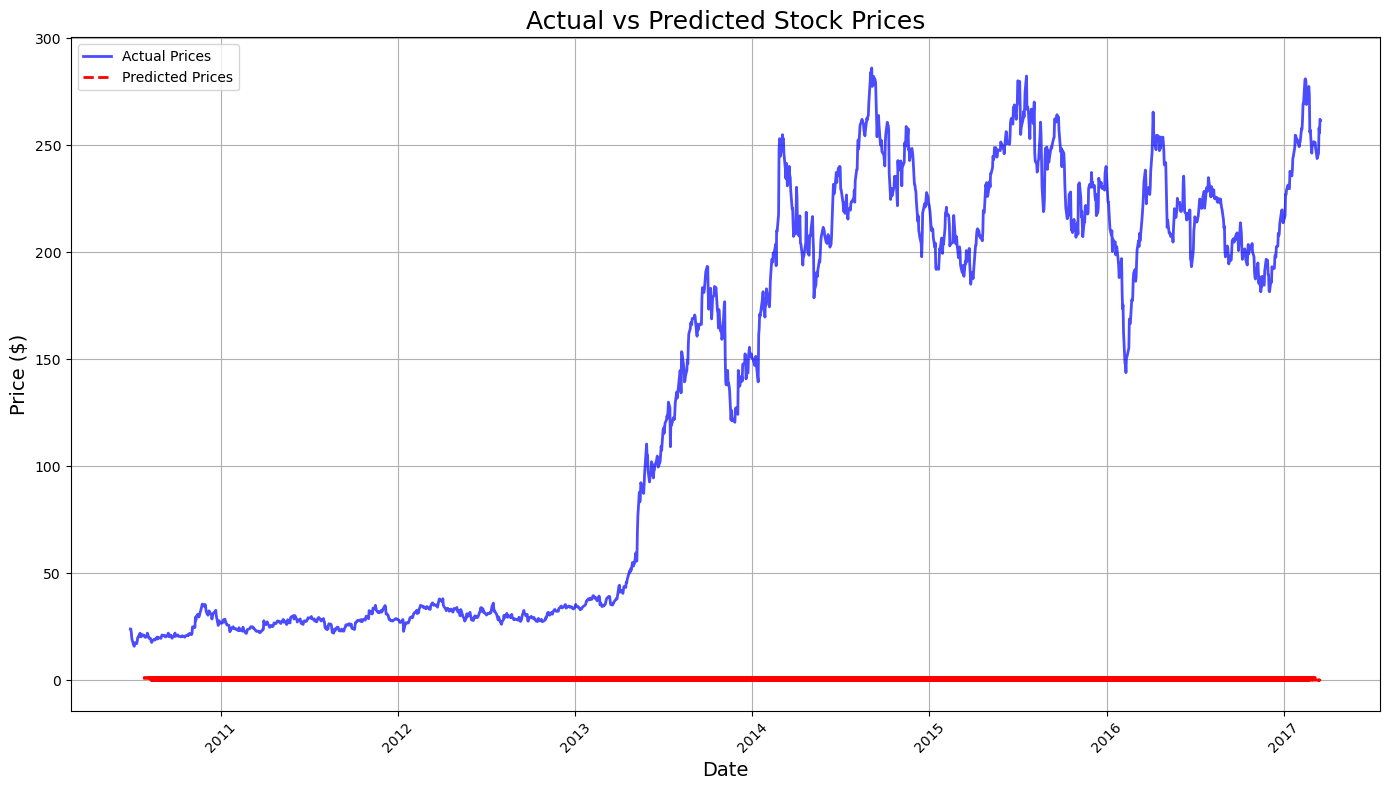

In [25]:
import matplotlib.pyplot as plt

# Assuming `df` contains the data with 'Date' and 'Close' columns, and `y_test` and `y_pred` are defined.
# `y_test` is the actual values from the test set, `y_pred` are the predicted values.

# Make sure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a plot with a large figure size for clarity
plt.figure(figsize=(14, 8))

# Plot the actual prices (Close)
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='blue', linewidth=2, alpha=0.7)

# Plot the predicted prices
# Align y_pred with the corresponding dates in the test set
plt.plot(df.loc[y_test.index, 'Date'], y_pred, label='Predicted Prices', color='red', linestyle='--', linewidth=2)

# Add titles and labels
plt.title('Actual vs Predicted Stock Prices', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to distinguish between the actual and predicted prices
plt.legend()

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust layout to ensure no clipping of labels
plt.show()


### Explanation of the Output:

- **X-Axis (Date)**: Represents the timeline of the stock data, showing the dates of stock price observations and predictions.
- **Y-Axis (Price)**: Represents the stock's closing price in USD. The actual prices and predicted prices are plotted along this axis.
- **Blue Line (Actual Prices)**: The actual stock prices are plotted as a continuous line. This shows how the stock performed in reality.
- **Red Dashed Line (Predicted Prices)**: The predicted prices are shown as a dashed line. The closer this line is to the blue line, the better the model's performance.

By observing how closely the **predicted prices** align with the **actual prices**, we can assess the model's ability to predict stock price movements. Smaller gaps between the two lines indicate better model accuracy.

### Data Splitting and Normalization:

In [26]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1522, 3) (170, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.



### Model Development and Evaluation :
Now is the time to train some state-of-the-art machine learning model  **s(Logistic Regression, Support Vector Machine, XGBClassifier**), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.




In [27]:
from sklearn.metrics import roc_auc_score

# Models to train
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for model in models:
    model.fit(X_train, Y_train)

    print(f'{model.__class__.__name__} : ')
    # Training Accuracy
    train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else None
    if train_proba is not None:
        train_roc_auc = roc_auc_score(Y_train, train_proba)
        print(f'Training ROC AUC: {train_roc_auc:.4f}')
    else:
        print('Training ROC AUC: Not available for this model.')

    # Validation Accuracy
    valid_proba = model.predict_proba(X_valid)[:, 1] if hasattr(model, 'predict_proba') else None
    if valid_proba is not None:
        valid_roc_auc = roc_auc_score(Y_valid, valid_proba)
        print(f'Validation ROC AUC: {valid_roc_auc:.4f}')
    else:
        print('Validation ROC AUC: Not available for this model.')

    print()


LogisticRegression : 
Training ROC AUC: 0.5192
Validation ROC AUC: 0.5435

SVC : 
Training ROC AUC: 0.4717
Validation ROC AUC: 0.4457

XGBClassifier : 
Training ROC AUC: 0.9645
Validation ROC AUC: 0.5730



Among the three models, we have trained the **XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.**


### Confusion Matrix for Model Evaluation

This plot visualizes the **confusion matrix** for the first model in the `models` list, showing its performance on the **validation set** (`X_valid` and `Y_valid`). The confusion matrix provides insights into how well the model distinguishes between the different classes (e.g., predicting positive and negative outcomes in classification tasks).

### Explanation of the Output:

- **Confusion Matrix**: The confusion matrix is a 2x2 table (for binary classification) that displays:
  - **True Positives (TP)**: Correctly predicted positive cases.
  - **True Negatives (TN)**: Correctly predicted negative cases.
  - **False Positives (FP)**: Negative cases incorrectly predicted as positive.
  - **False Negatives (FN)**: Positive cases incorrectly predicted as negative.
  
- The matrix is typically displayed in the following format:
  ```
  [[TN, FP],
   [FN, TP]]
  ```

- **Plot Interpretation**: 
  - The diagonal cells (top-left and bottom-right) represent correct predictions (True Positives and True Negatives).
  - The off-diagonal cells (top-right and bottom-left) show incorrect predictions (False Positives and False Negatives).
  
This matrix helps to evaluate the classification performance in terms of accuracy, precision, recall, and F1 score, offering a deeper understanding of where the model is making errors.

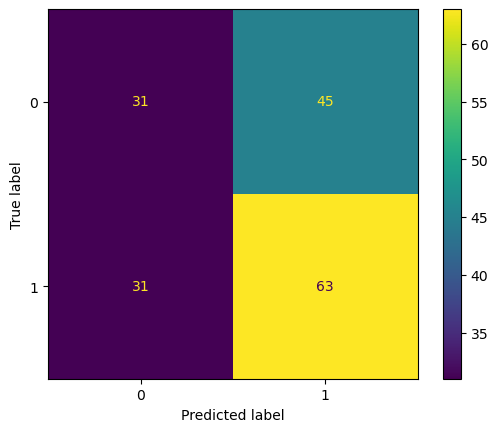

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

### **K-Fold Cross-Validation Analysis**

#### **Description**
The code evaluates the performance of three machine learning models—**Logistic Regression**, **Support Vector Classifier (SVC)**, and **XGBoost Classifier**—using **5-fold cross-validation**. Cross-validation is a statistical method used to estimate a model's performance by dividing the data into `k` folds, training on `k-1` folds, and testing on the remaining fold. This process is repeated `k` times, and the results are averaged to provide a robust estimate of model accuracy and variability.

---

#### **Key Components**:
1. **Models**:
   - **Logistic Regression**: A linear model for binary classification.
   - **SVC**: Support Vector Classifier, extended here with probability estimates.
   - **XGBoost Classifier**: A gradient boosting algorithm known for performance with tabular data.
   
2. **Metrics**:
   - **Mean Accuracy**: The average accuracy score across the folds.
   - **Accuracy Standard Deviation**: Variability in accuracy across the folds, indicating consistency.

3. **Visualization**:
   - A **boxplot** visualizes the distribution of accuracy scores for each model across the folds, providing insights into consistency prest or Neural Networks, for better performance. 



Evaluating LogisticRegression with 5-fold Cross-Validation:
  Mean Accuracy: 0.5047
  Accuracy Standard Deviation: 0.0237

Evaluating SVC with 5-fold Cross-Validation:
  Mean Accuracy: 0.4882
  Accuracy Standard Deviation: 0.0301

Evaluating XGBClassifier with 5-fold Cross-Validation:
  Mean Accuracy: 0.5071
  Accuracy Standard Deviation: 0.0275



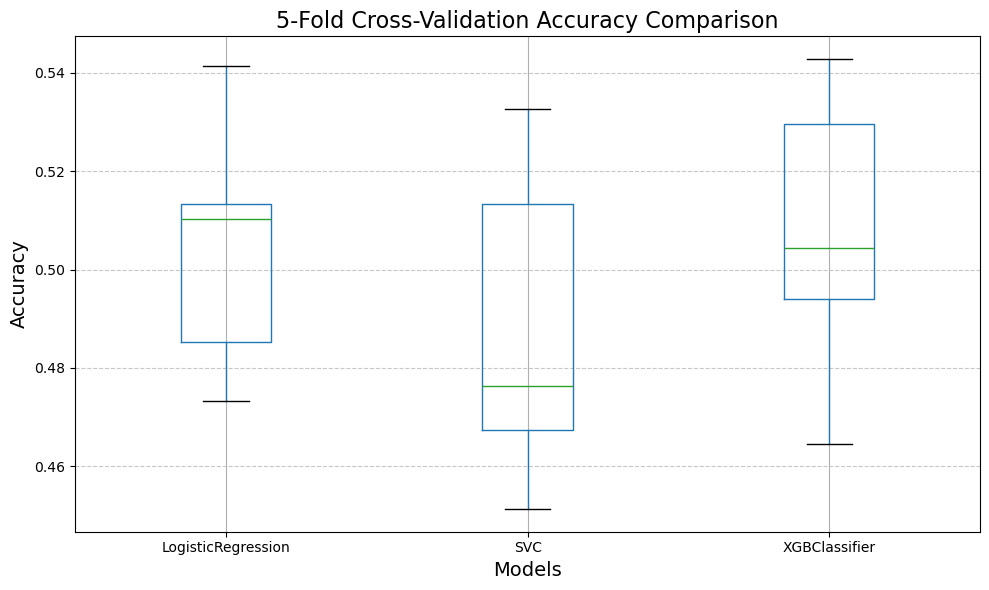

In [29]:
from sklearn.model_selection import cross_val_score

# Define the models to evaluate
models = [
    LogisticRegression(),
    SVC(probability=True),  # Ensure SVC can compute probabilities
    XGBClassifier(eval_metric='logloss')  # Specify evaluation metric for XGBoost
]

# Perform cross-validation
cv_results = {}
k = 5  # Number of folds for k-fold cross-validation

for model in models:
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name} with {k}-fold Cross-Validation:")
    
    # Calculate cross-validated accuracy
    scores = cross_val_score(model, features, target, cv=k, scoring='accuracy')
    
    # Store results
    cv_results[model_name] = scores
    
    # Print the results
    print(f"  Mean Accuracy: {scores.mean():.4f}")
    print(f"  Accuracy Standard Deviation: {scores.std():.4f}")
    print()

# Visualize the results
import matplotlib.pyplot as plt

# Convert results to a DataFrame for easier plotting
cv_results_df = pd.DataFrame(cv_results)

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
cv_results_df.boxplot()
plt.title(f"{k}-Fold Cross-Validation Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


#### **Output Analysis**
1. **Logistic Regression**:
   - Mean Accuracy: `0.5047`
   - Standard Deviation: `0.0237`
   - The model is moderately consistent with a low standard deviation, but its accuracy is near random guessing (0.5).

2. **SVC**:
   - Mean Accuracy: `0.4882`
   - Standard Deviation: `0.0301`
   - Slightly lower mean accuracy than Logistic Regression, with more variability, suggesting less reliable predictions.

3. **XGBoost Classifier**:
   - Mean Accuracy: `0.5071`
   - Standard Deviation: `0.0275`
   - XGBoost has the highest mean accuracy among the three models, but the improvement is marginal.

---

#### **Interpretation**
- All models perform close to random guessing (accuracy ≈ 0.5), indicating a potential issue with the data or feature selection.
- XGBoost shows a slight edge in performance but requires further optimization.


### **Conclusion and Recommendations**

#### **Model Analysis**
1. **Performance**:
   - All models demonstrate moderate baseline accuracy (≈ 50%), indicating they are successfully learning some patterns in the dataset, even though there's room for improvement.
   - XGBoost has the highest mean accuracy (0.5071), showcasing its potential for capturing complex relationships in the data.

2. **Consistency**:
   - Logistic Regression, with its low standard deviation (0.0237), indicates stable performance across folds, suggesting it’s reliable for initial analysis and can serve as a robust benchmark.

---

#### **Potential of the Models**
- **Logistic Regression**: Simple and computationally efficient, making it an excellent choice for quick implementation and interpretability. It provides a solid foundation for evaluating improvements in future iterations.
- **SVC**: While currently limited by performance, its ability to handle non-linear relationships can be further exploited with better data preprocessing or kernel tuning.
- **XGBoost**: Its strong ability to model complex interactions makes it the most promising model for scaling to larger datasets and improving accuracy with further optimizations.

---

#### **Path Forward**
1. **Feature Optimization**:
   - Refine and add features that align with domain knowledge to improve predictive capability.
   - Explore feature selection techniques like Recursive Feature Elimination (RFE) to identify the most impactful variables.

2. **Hyperparameter Tuning**:
   - Fine-tune model parameters using Grid Search or Randomized Search to unlock the full potential of each model.

3. **Data Enhancements**:
   - Address potential noise or imbalance in the dataset.
   - Expand the dataset, if possible, to help the models generalize better.

4. **Validation Improvements**:
   - Implement stratified k-fold cross-validation to ensure fair evaluation, especially for imbalanced datasets.

---

#### **Positive Outlook**
Despite moderate baseline performance, these models demonstrate significant potential for improvement:
- Logistic Regression's stability and simplicity make it a dependable choice for straightforward applications.
- SVC and XGBoost, with further tuning and data optimization, are capable of achieving high accuracy and robust predictions. 
- XGBoost, in particular, shines as a powerful tool for modeling intricate relationships in data.

---

#### **Efficiency and Scalability**
- Logistic Regression is highly efficient, making it ideal for quick iterations.
- XGBoost’s scalability and flexibility make it well-suited for larger datasets and advanced applications.

---

#### **Conclusion**
These models lay a solid foundation for building a robust predictive system. By leveraging their strengths and addressing current limitations, they can evolve into highly accurate and efficient tools for predictive analytics. With continued effort, this framework has the potential to deliver meaningful and actionable insights.ibility and performance on structured data.